In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/torontoemotionalspeechsetmfcccsv/tessmfcc - tessmfcc.csv


In [2]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
#Keras
import keras

#correlation matrix/ploting
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Exploratory Data Analysis Process

Import extracted data from audio files data set. 
https://www.kaggle.com/mohsenghaffari/audio-feature-extraction

In [3]:
data_csv=r'../input/torontoemotionalspeechsetmfcccsv/tessmfcc - tessmfcc.csv'
speech_data=pd.read_csv(data_csv)
speech_data.name="speech_data"
speech_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            2800 non-null   object 
 1   chroma_stft         2800 non-null   float64
 2   rmse                2800 non-null   float64
 3   spectral_centroid   2800 non-null   float64
 4   spectral_bandwidth  2800 non-null   float64
 5   rolloff             2800 non-null   float64
 6   zero_crossing_rate  2800 non-null   float64
 7   mfcc1               2800 non-null   float64
 8   mfcc2               2800 non-null   float64
 9   mfcc3               2800 non-null   float64
 10  mfcc4               2800 non-null   float64
 11  mfcc5               2800 non-null   float64
 12  mfcc6               2800 non-null   float64
 13  mfcc7               2800 non-null   float64
 14  mfcc8               2800 non-null   float64
 15  mfcc9               2800 non-null   float64
 16  mfcc10

In [4]:
speech_data.describe(include='all')

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
count,2800,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,...,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800
unique,2800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
top,YAF_far_sad.wav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YAF_fear
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200
mean,NaN,0.303052,0.030460,2584.053960,2185.350602,4368.221551,0.145232,-406.983130,59.644992,6.044936,...,2.961621,-5.770511,4.208616,-1.440907,-0.647901,-0.885825,3.645658,-3.421986,0.513861,NaN
std,NaN,0.041358,0.018385,585.770220,141.149027,899.357579,0.053404,67.488706,22.311429,15.695915,...,6.632255,4.522339,4.027290,4.606527,4.140212,3.376323,5.556229,4.337601,5.479329,NaN
min,NaN,0.195836,0.007025,1447.209896,1640.599736,2126.054244,0.062149,-582.415039,-5.006874,-34.902603,...,-16.693747,-22.271099,-7.723586,-15.187091,-13.551081,-12.540980,-9.657565,-20.396843,-15.766962,NaN
25%,NaN,0.273299,0.017204,2105.699734,2089.921965,3685.059586,0.100226,-447.440025,42.365483,-6.919160,...,-1.557922,-8.473173,1.229606,-4.463483,-3.818829,-3.196777,-0.933113,-6.297567,-2.673027,NaN
50%,NaN,0.300919,0.025709,2482.556558,2186.506654,4322.829536,0.131841,-407.404465,62.178057,5.626654,...,3.368225,-5.189636,4.612883,-1.232564,-0.391647,-0.782590,3.027758,-2.990456,0.214341,NaN
75%,NaN,0.332045,0.037865,3022.474061,2280.305885,5082.236732,0.184089,-358.002182,76.719645,18.930343,...,8.036033,-2.615223,7.253180,1.547477,2.604910,1.395558,7.967804,-0.364611,3.276654,NaN


Functions

In [5]:
def ins_df(df):
    print('\n df shape:')
    print(df.shape)

    print('\nColumns: ')
    print (df.columns.values)

    print('\nNull data inspection: \n')
    print (df[df.isna()].count())     

# Data Manipulation and Feature Engineering
#### extract age and emotion categorical data from the label column

In [6]:
# extract data from label
speech_ex_data = pd.DataFrame()
speech_ex_data['label'] = speech_data['label']
speech_ex_data = speech_ex_data.iloc[:,0].str.extract(r'(?P<age>\w{3})''_''(?P<emotion>\w*)')

# add exteracted data to df
speech_data['age']=speech_ex_data['age']
speech_data['emotion']=speech_ex_data['emotion']

speech_data.drop(columns=['filename','label'],inplace=True)
#df.drop(columns=['B', 'C'])

ins_df(speech_data)


 df shape:
(2800, 28)

Columns: 
['chroma_stft' 'rmse' 'spectral_centroid' 'spectral_bandwidth' 'rolloff'
 'zero_crossing_rate' 'mfcc1' 'mfcc2' 'mfcc3' 'mfcc4' 'mfcc5' 'mfcc6'
 'mfcc7' 'mfcc8' 'mfcc9' 'mfcc10' 'mfcc11' 'mfcc12' 'mfcc13' 'mfcc14'
 'mfcc15' 'mfcc16' 'mfcc17' 'mfcc18' 'mfcc19' 'mfcc20' 'age' 'emotion']

Null data inspection: 

chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
age                   0
emotion 

In [7]:
print (speech_data.age.unique())
print (speech_data.emotion.unique())

['OAF' 'YAF']
['Fear' 'Pleasant_surprise' 'Sad' 'angry' 'disgust' 'happy' 'neutral'
 'fear' 'pleasant_surprised' 'sad']


## Fix inconsistancy in categories

In [8]:
speech_data.replace(['Fear','Pleasant_surprise','Sad'], ['fear','pleasant_surprised','sad'],inplace=True)
speech_data.replace(['OAF','YAF'], ['Old','Young'],inplace=True)

In [9]:
print (speech_data.age.unique())
print (speech_data.emotion.unique())

['Old' 'Young']
['fear' 'pleasant_surprised' 'sad' 'angry' 'disgust' 'happy' 'neutral']


## Visual data inspection
### Univariate Analysis

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


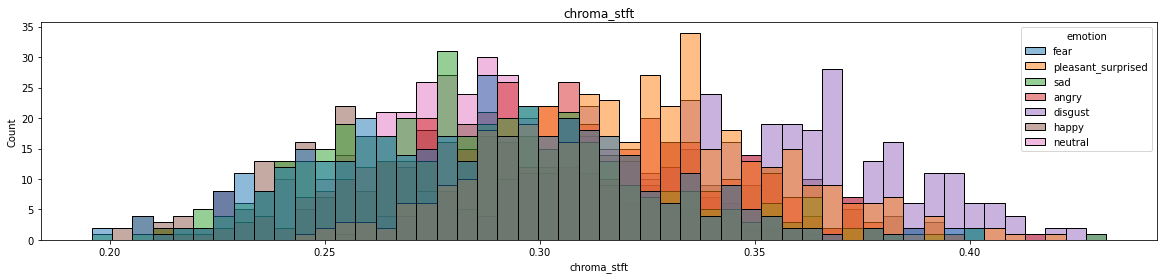

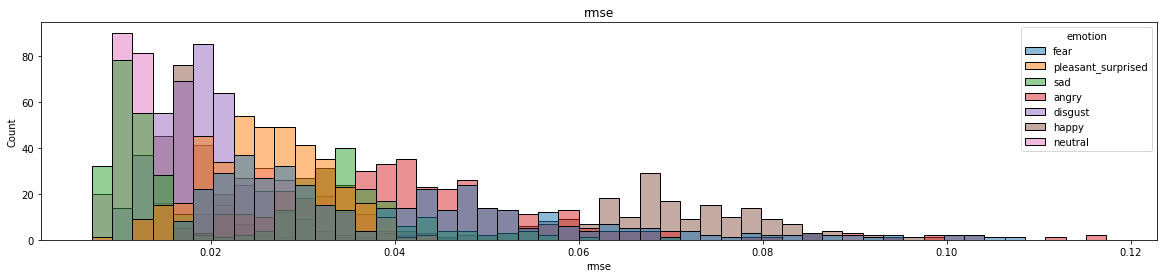

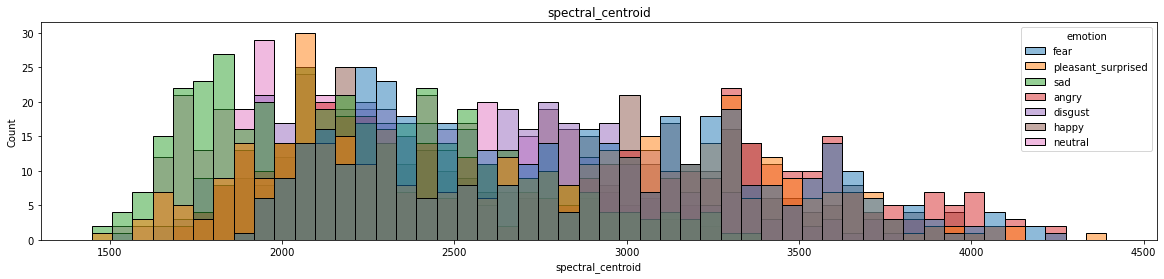

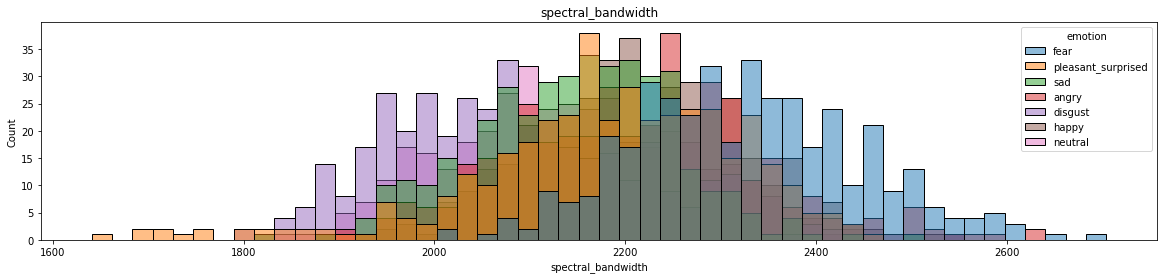

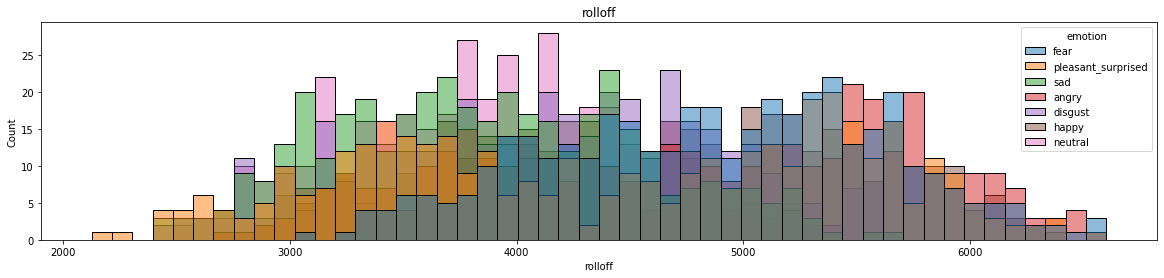

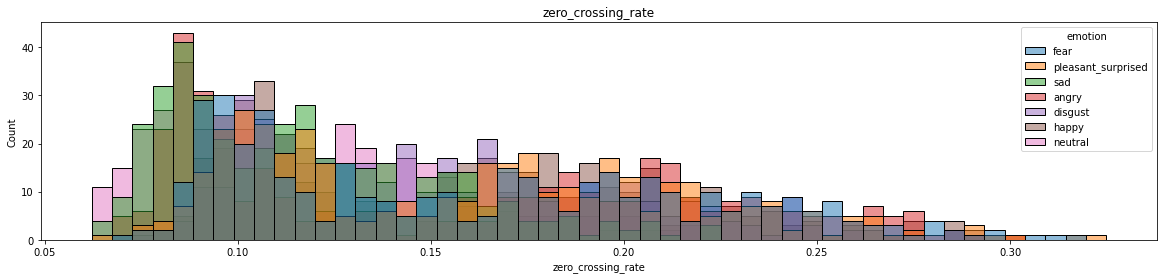

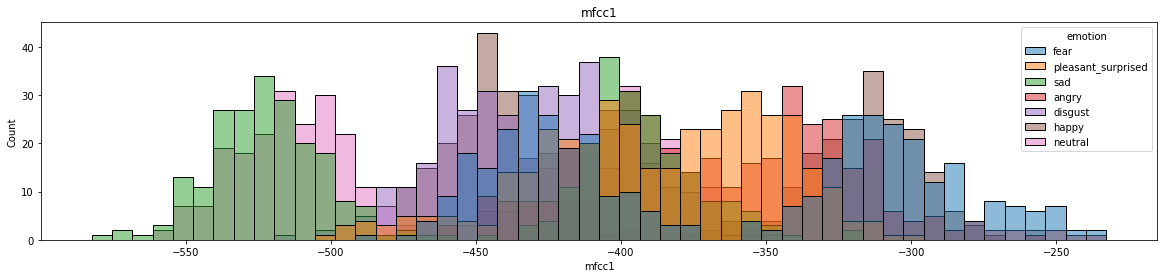

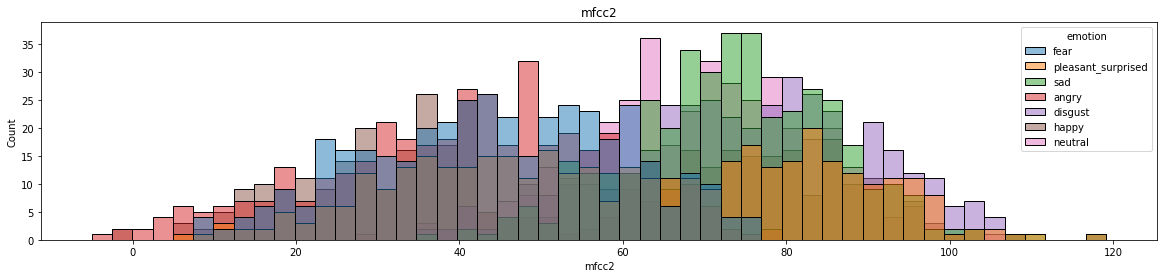

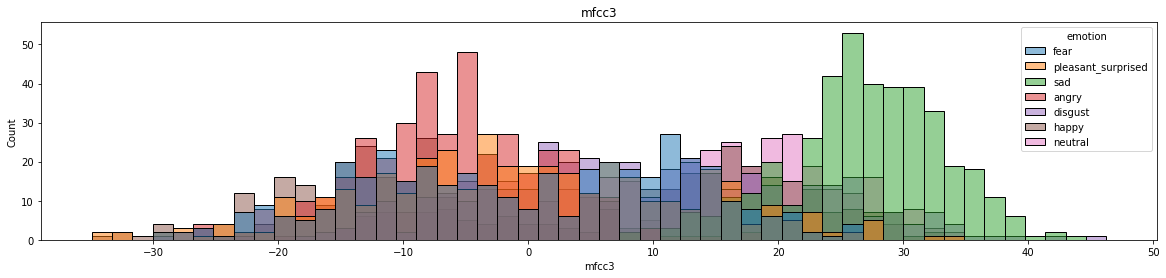

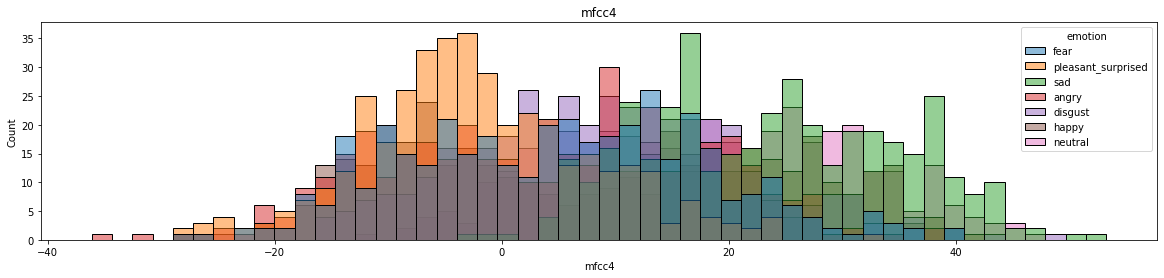

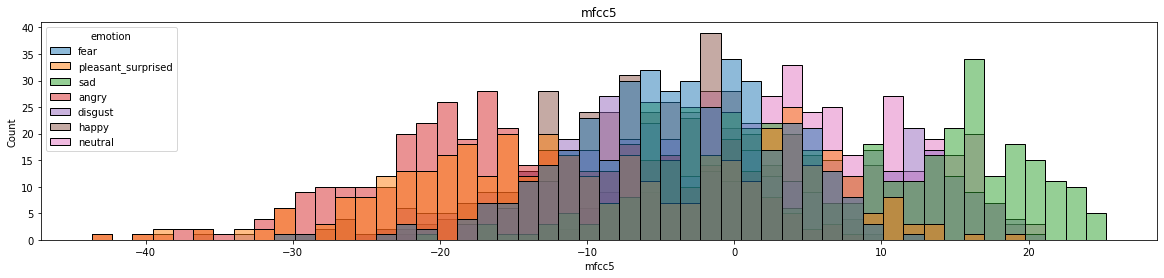

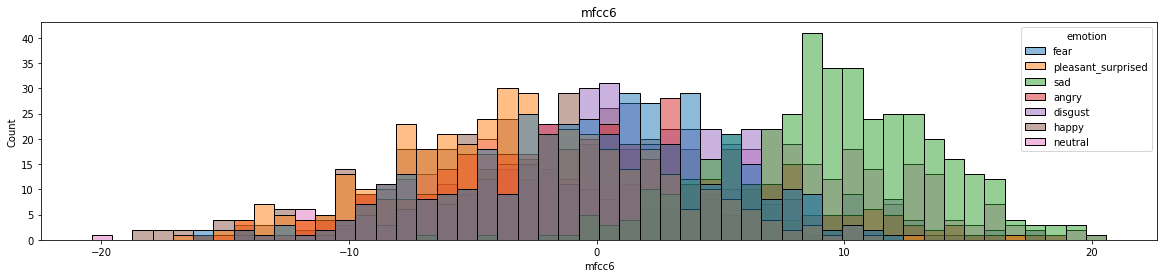

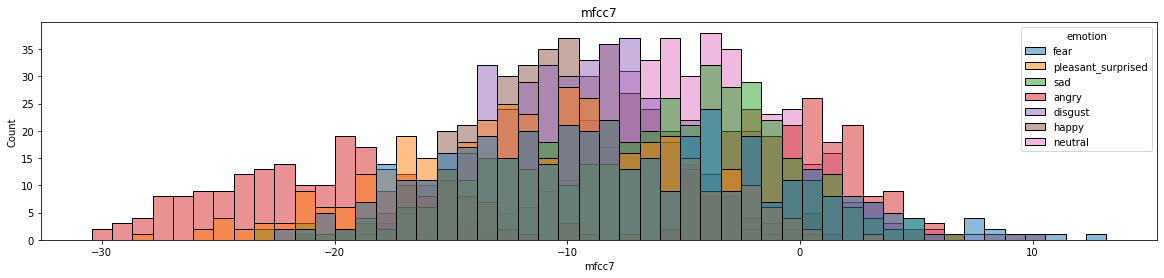

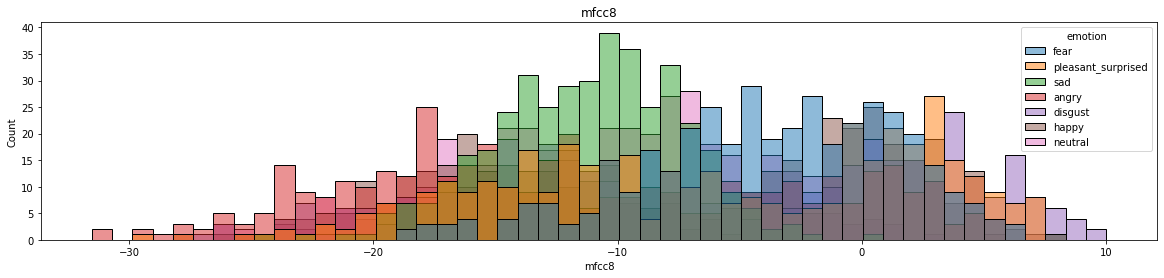

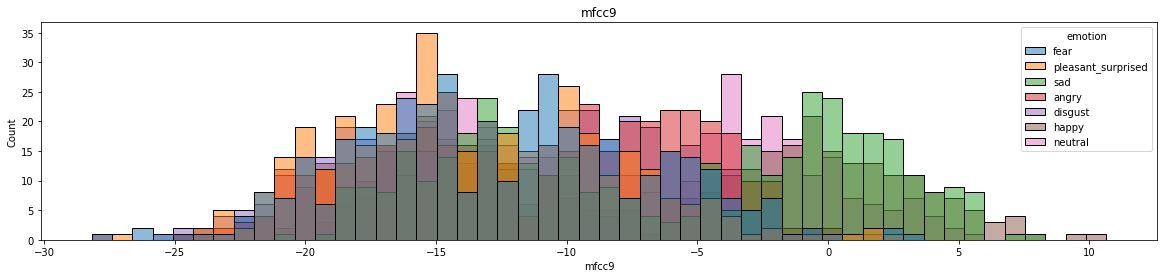

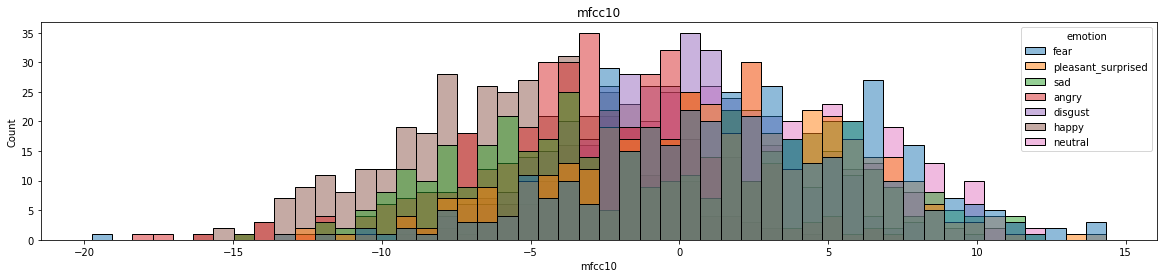

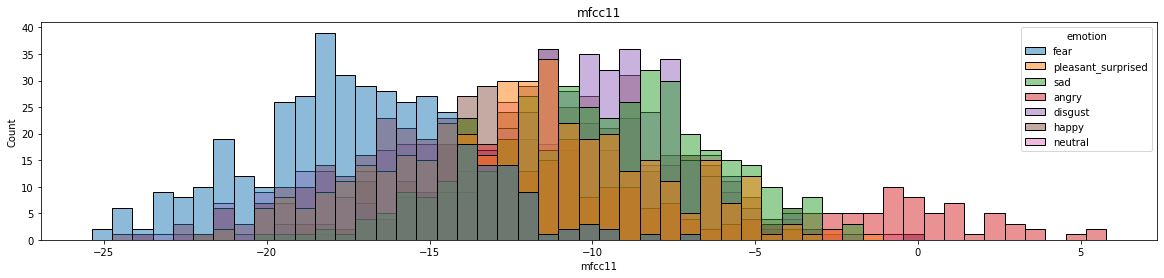

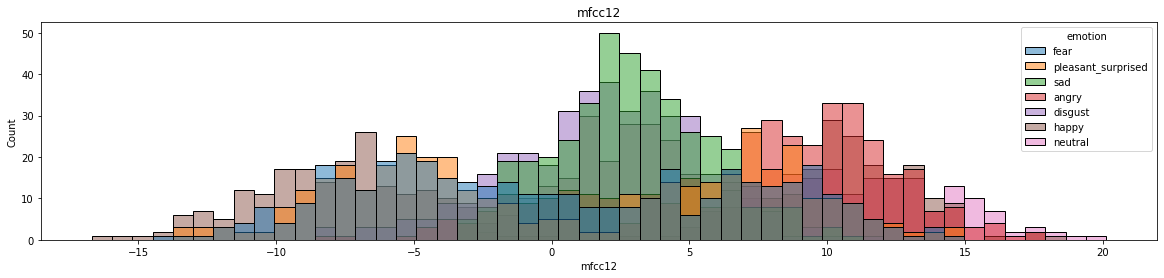

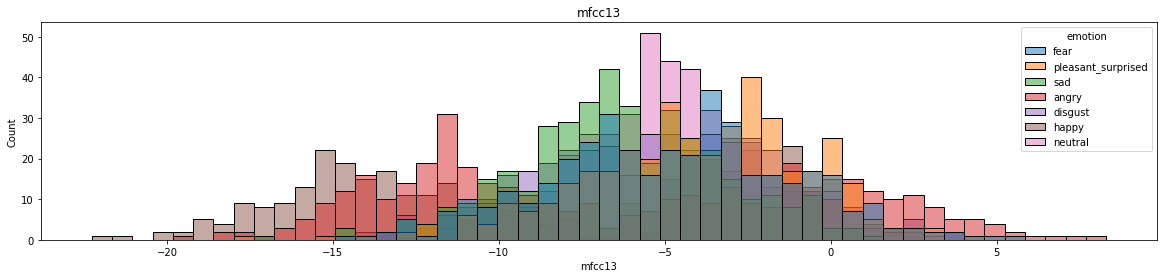

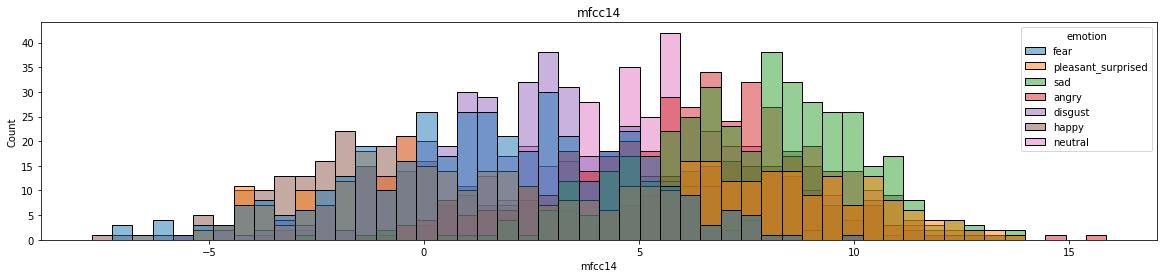

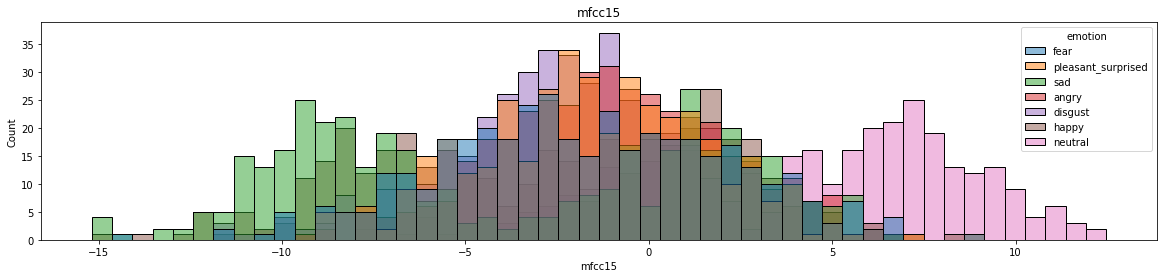

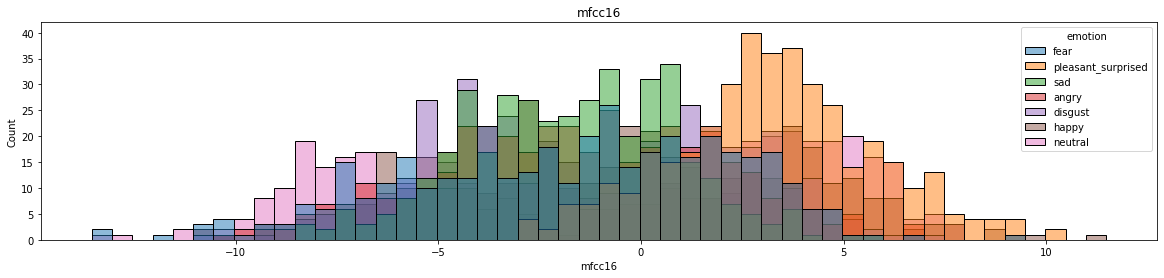

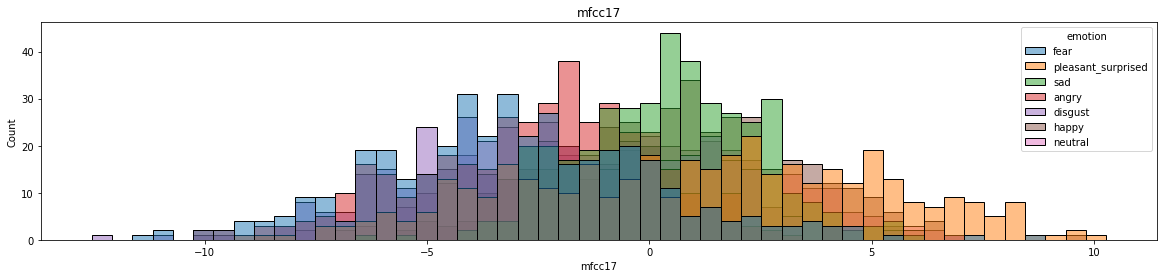

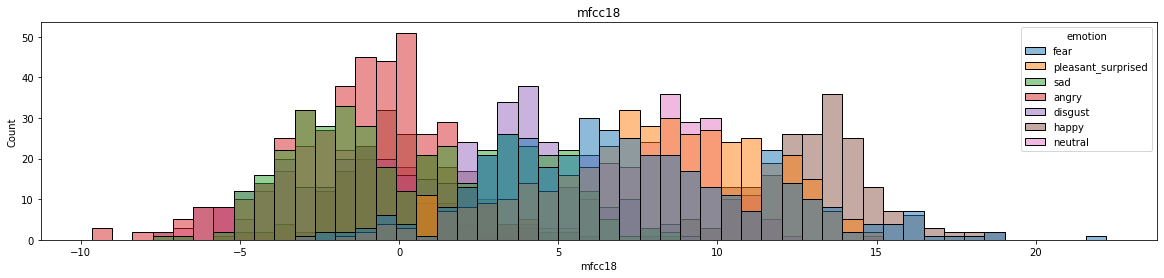

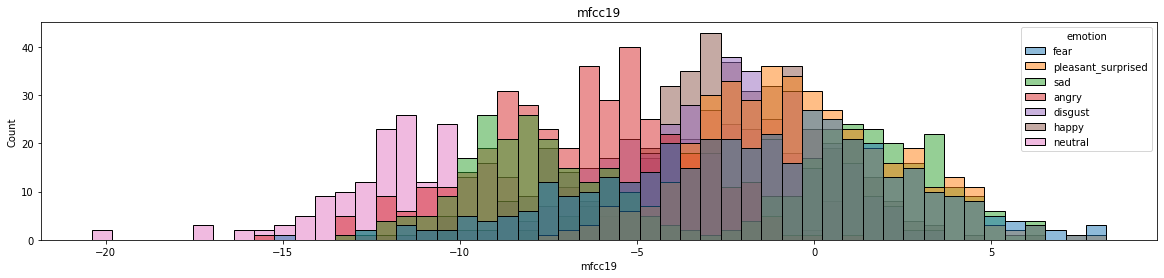

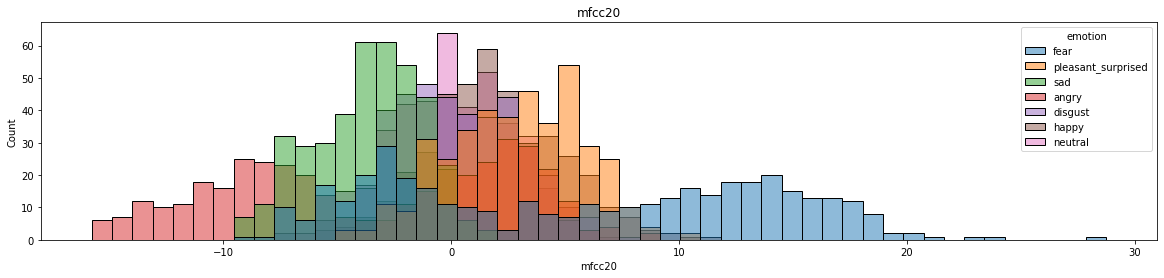

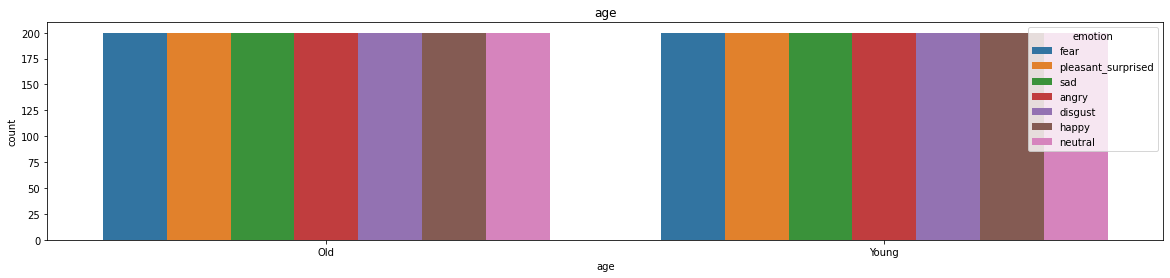

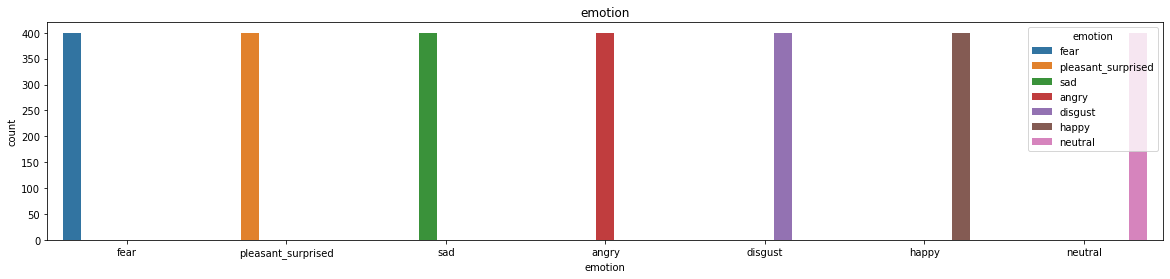

In [10]:

i=0

for column in speech_data:
    i=i+1
    plt.figure(column,figsize=(20,4))
    plt.title(column)
    if pd.api.types.is_numeric_dtype(speech_data[column]):
        sn.histplot(data=speech_data, x=column,bins=50,hue="emotion")
        filname=f'{column}_emotion.png'
        plt.savefig(filname)
    elif pd.api.types.is_string_dtype(speech_data[column]):
        
        fig=sn.countplot(x=column, hue='emotion', data=speech_data)
        filname=f'{column}_emotion.png'
        plt.savefig(filname)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


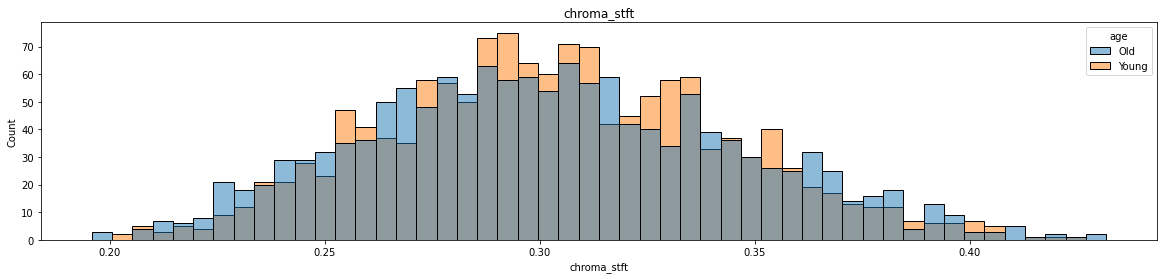

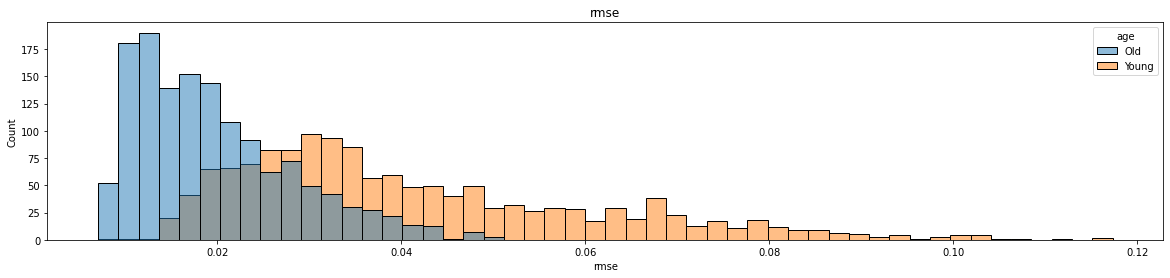

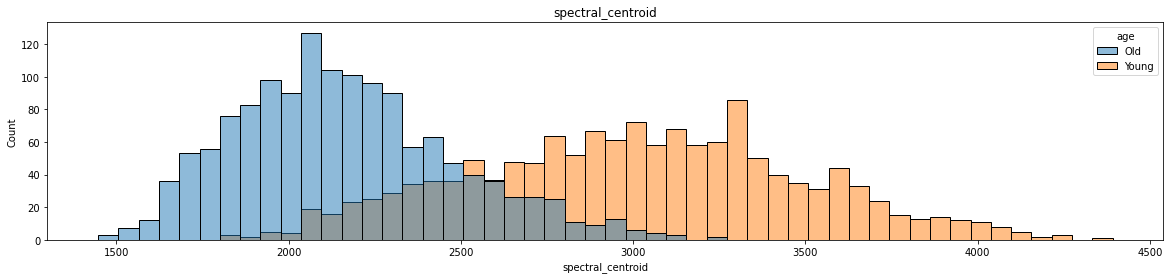

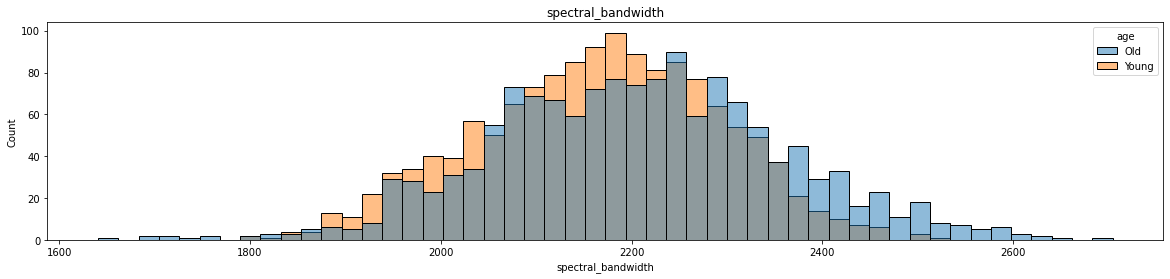

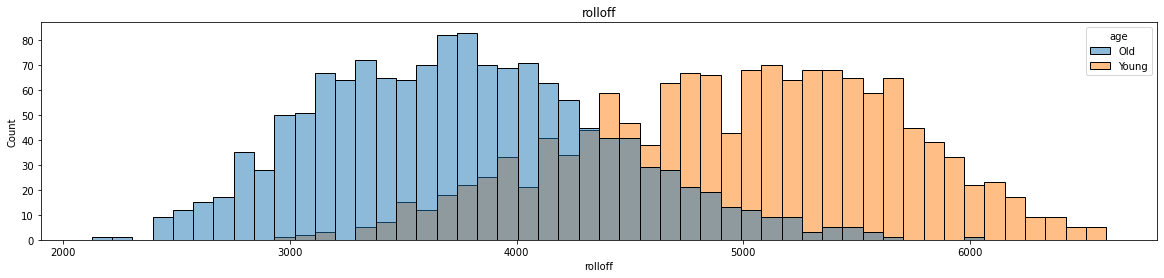

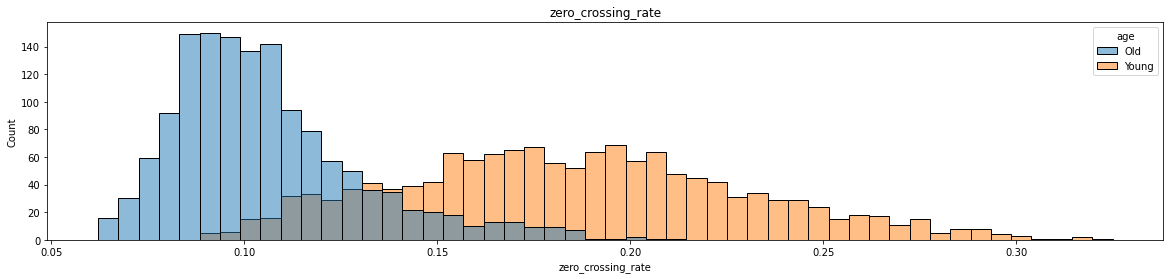

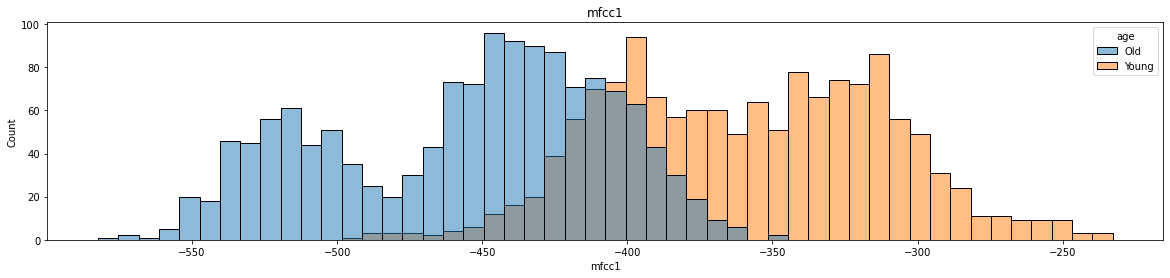

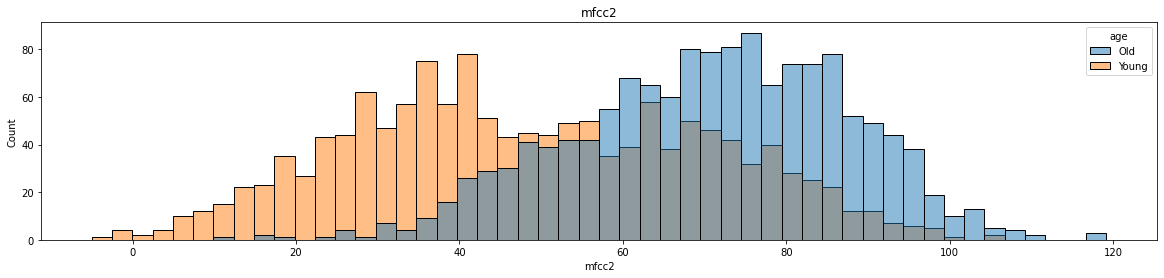

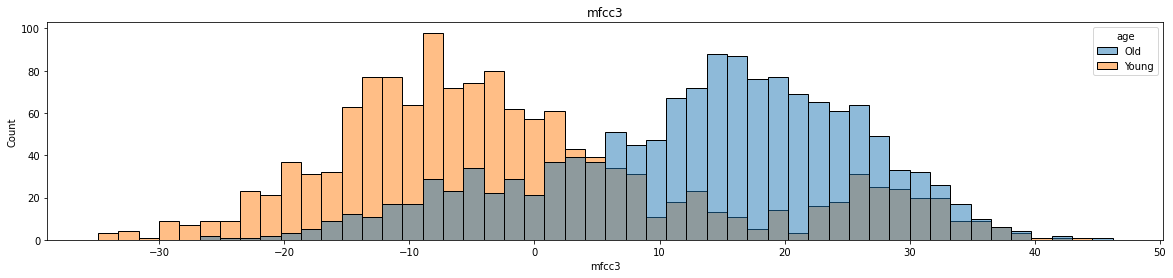

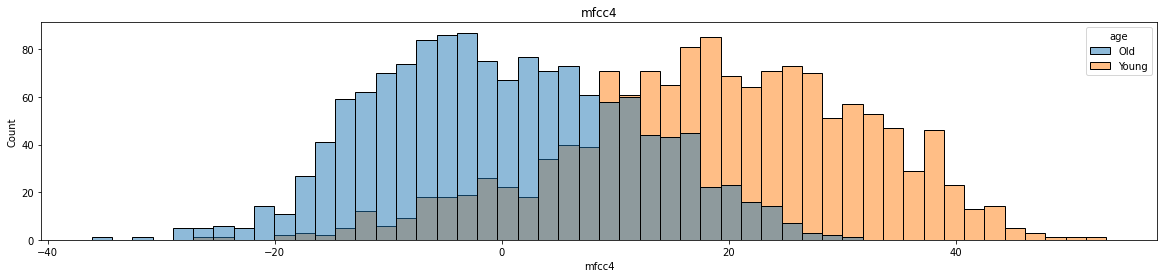

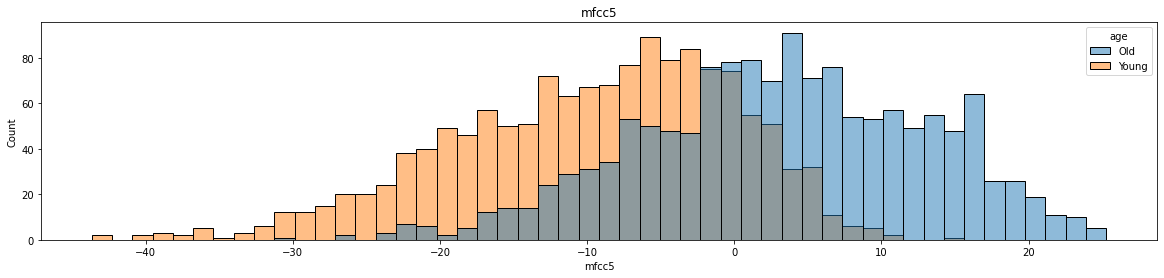

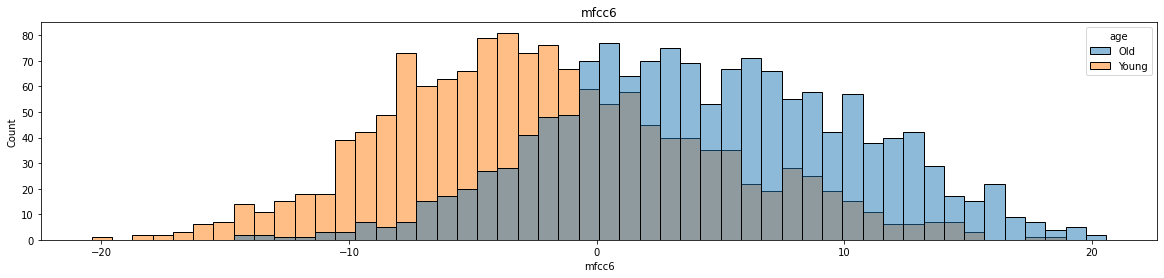

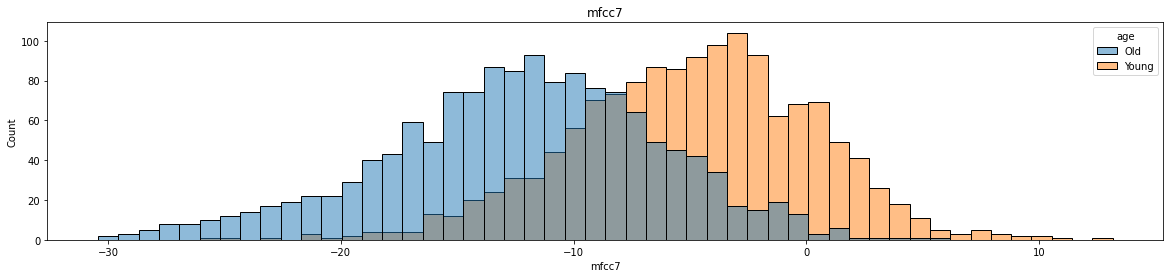

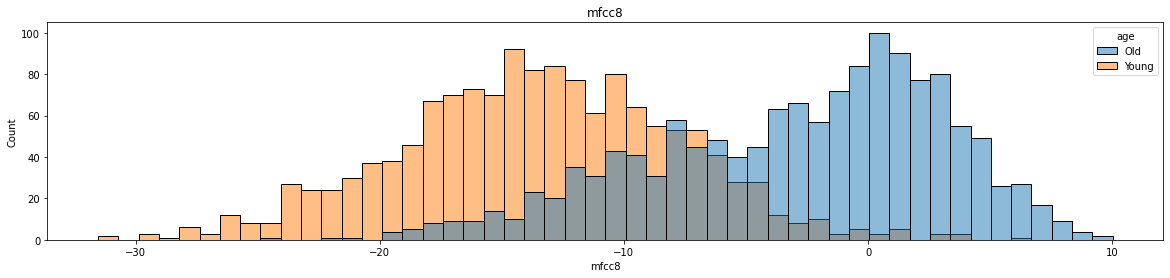

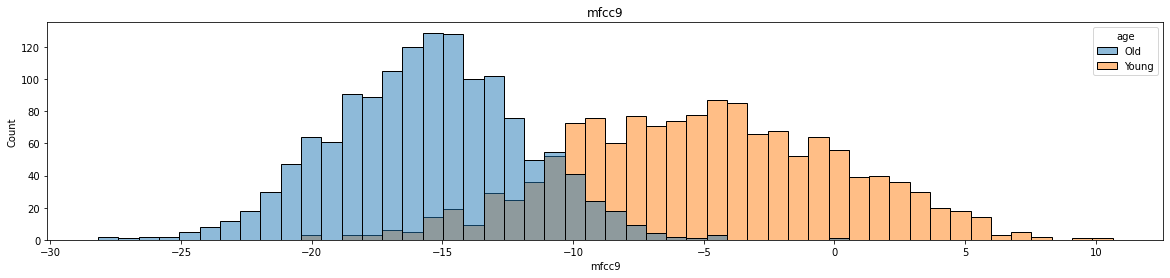

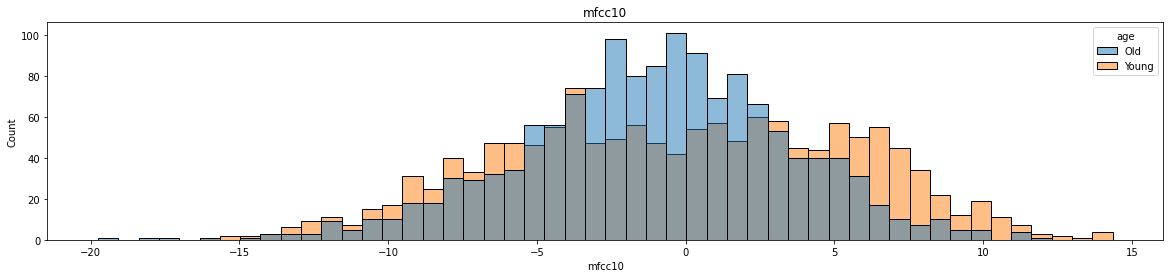

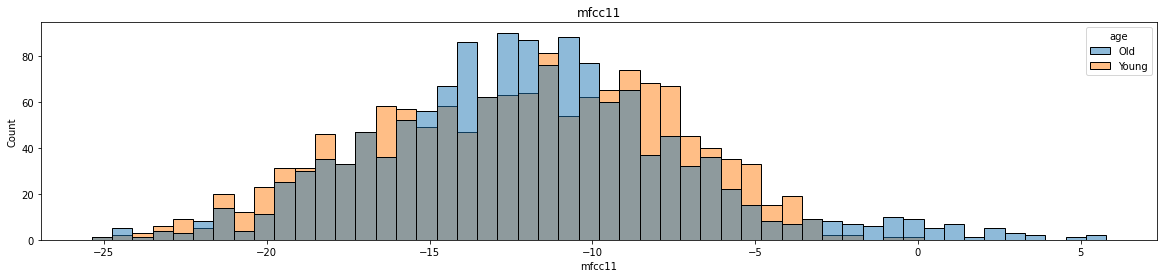

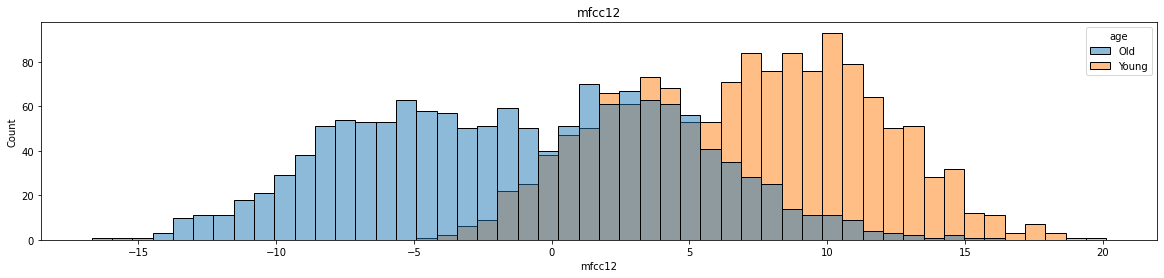

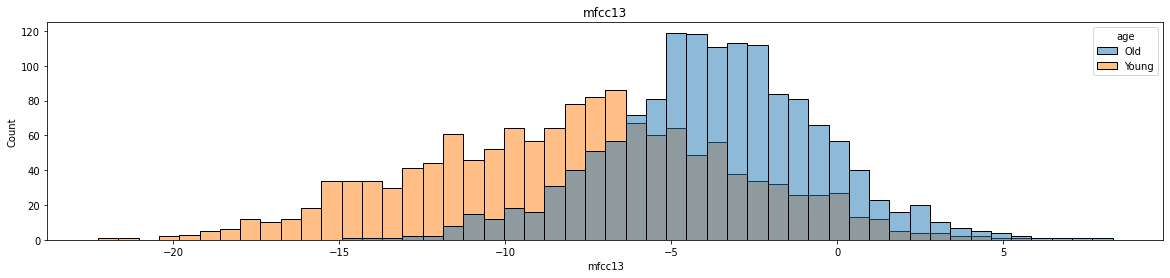

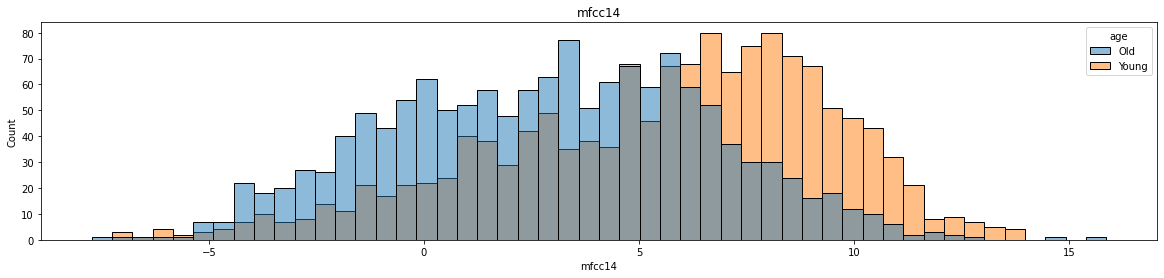

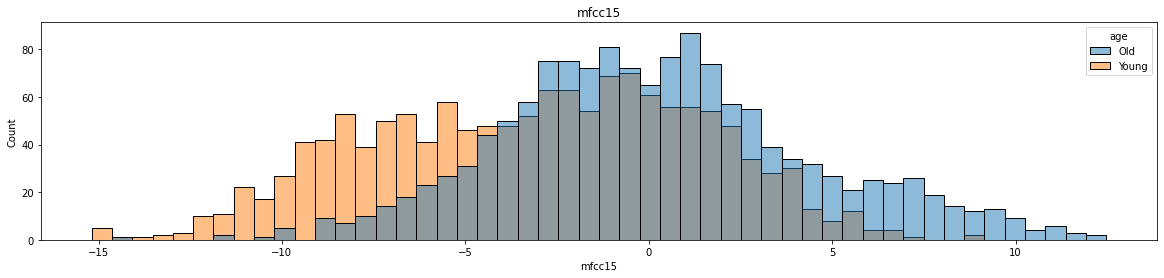

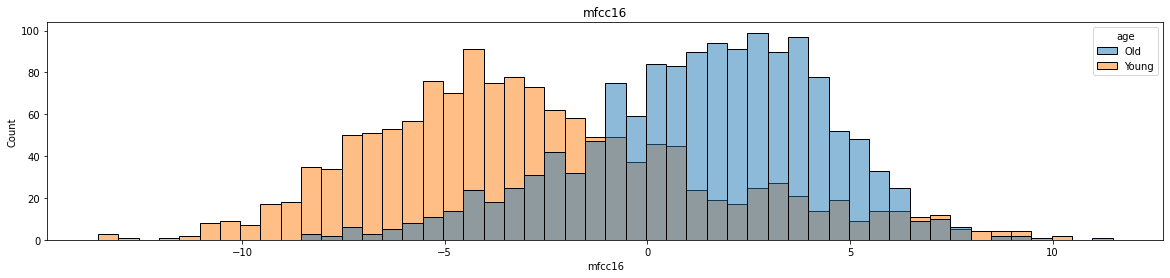

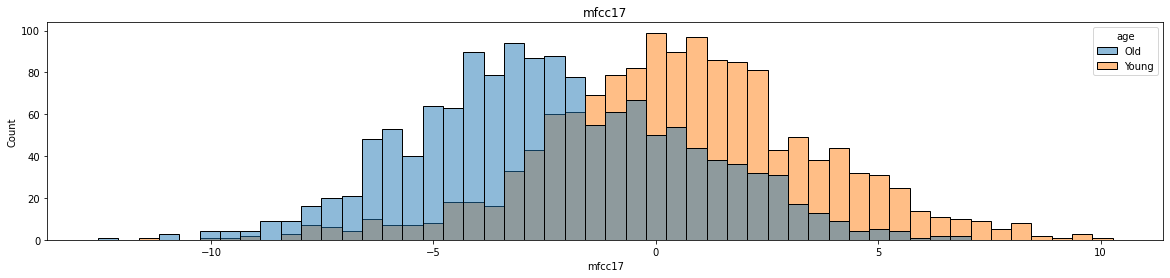

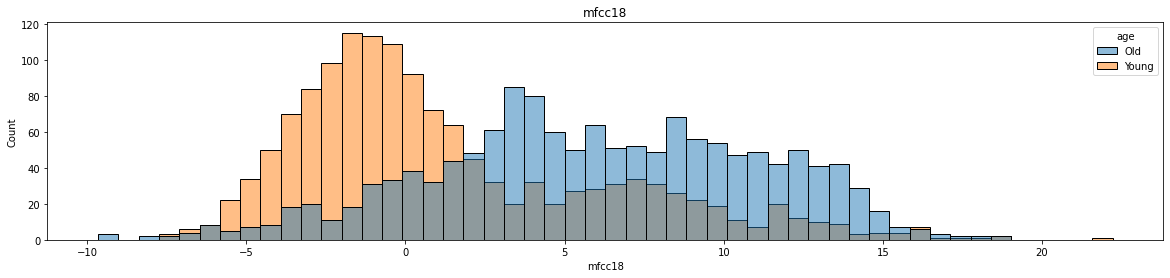

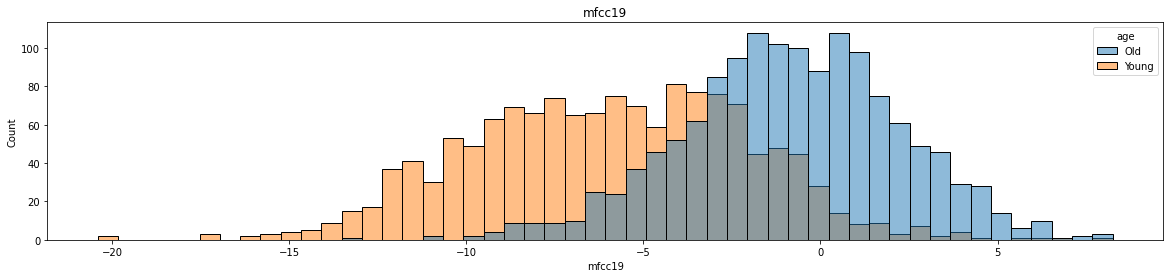

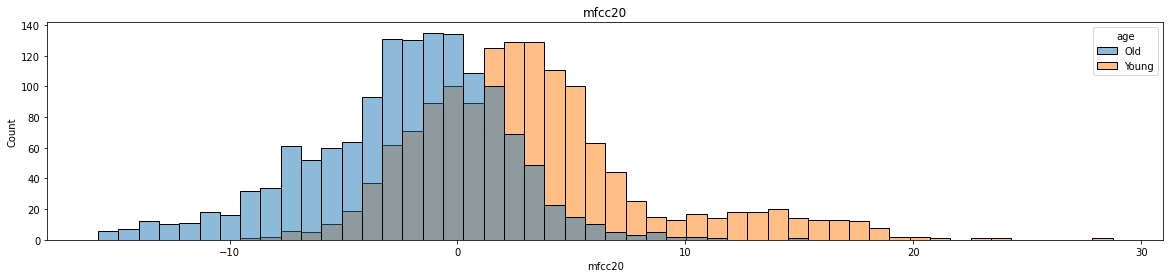

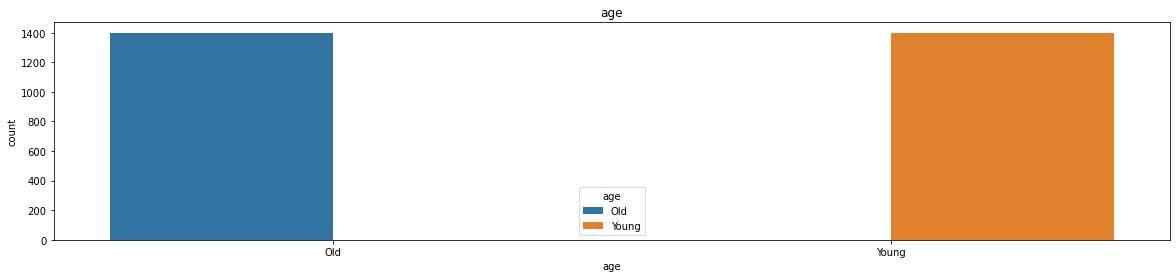

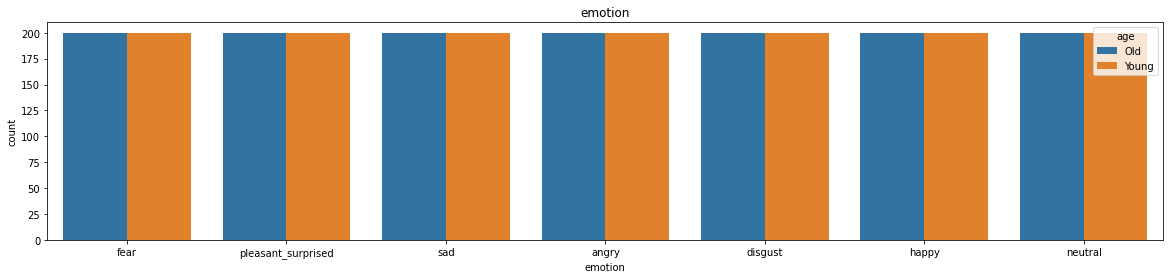

In [11]:

i=0

for column in speech_data:
    i=i+1
    plt.figure(column,figsize=(20,4))
    plt.title(column)
    if pd.api.types.is_numeric_dtype(speech_data[column]):
        sn.histplot(data=speech_data, x=column,bins=50,hue="age")
        filname=f'{column}_age.png'
        plt.savefig(filname)
    elif pd.api.types.is_string_dtype(speech_data[column]):
        
        fig=sn.countplot(x=column, hue="age", data=speech_data)
        filname=f'{column}_age.png'
        plt.savefig(filname)


### corrolation matrix heat map

<AxesSubplot:>

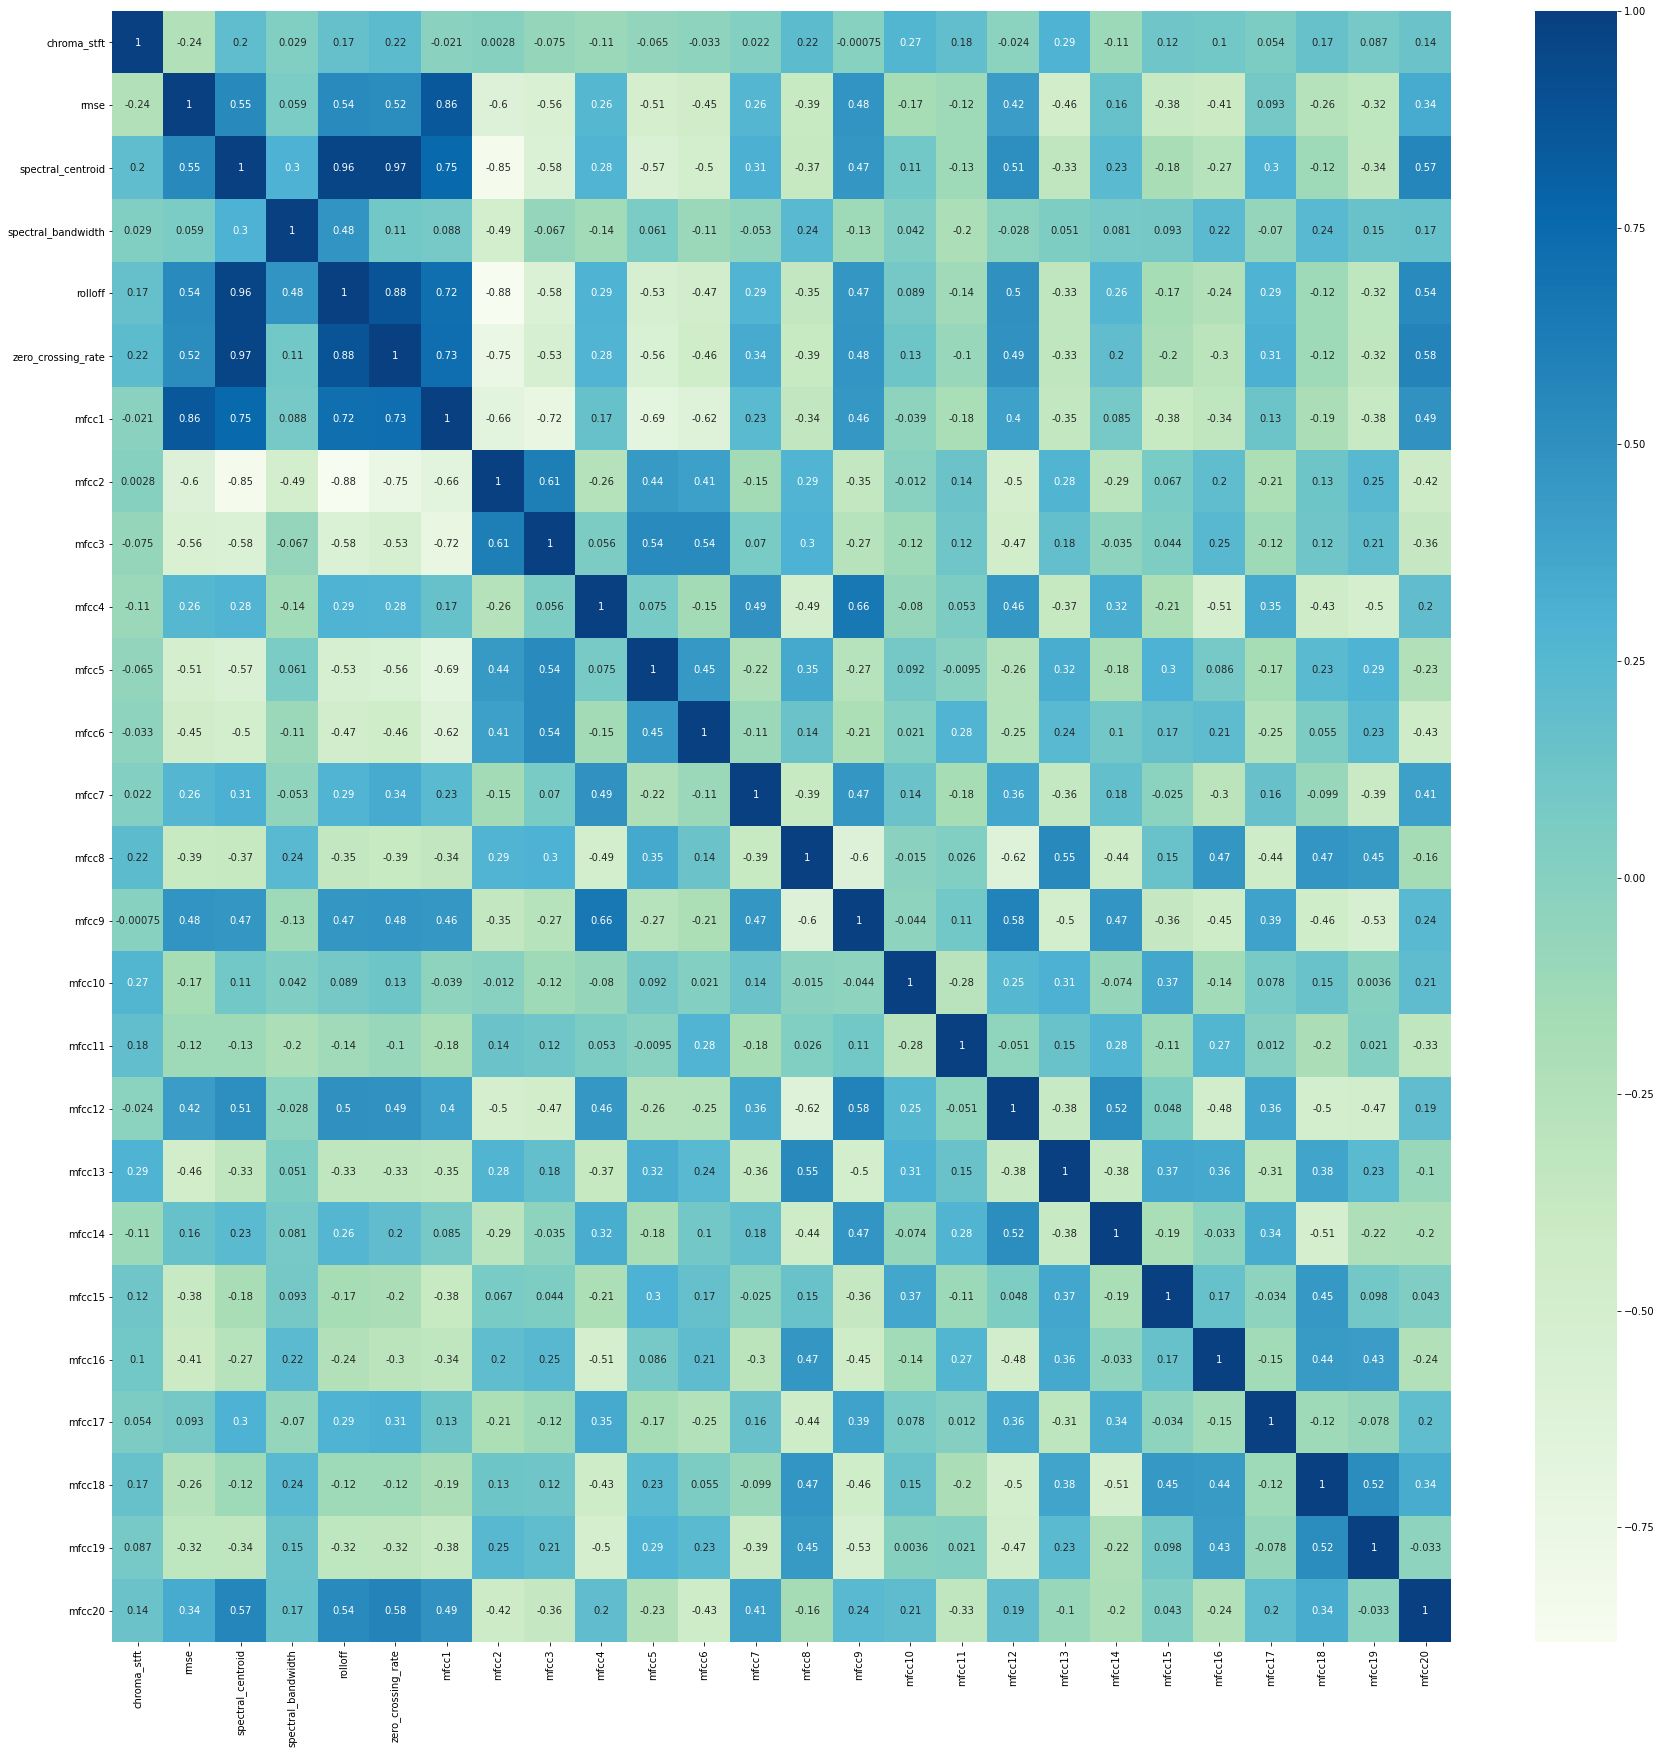

In [12]:
corr=speech_data.corr()
fig, ax = plt.subplots(figsize=(30,30))
sn.heatmap(corr,cmap='GnBu',annot=True,ax=ax)

In [13]:
cat_list = []
num_list = []

for column in speech_data:
    if pd.api.types.is_numeric_dtype(speech_data[column]):
        num_list.append(column)
    elif pd.api.types.is_string_dtype(speech_data[column]):
        cat_list.append(column)    

print(num_list)
print(cat_list)

['chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20']
['age', 'emotion']


# Clasification

### One Hot Encoding categories by their labels

In [14]:
encoder = ce.OneHotEncoder(cols=['age','emotion'],use_cat_names=True)
df_en = encoder.fit_transform(speech_data)
df_en.drop(columns=['age_Young'],inplace=True)

/opt/conda/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [15]:
ins_df(df_en)


 df shape:
(2800, 34)

Columns: 
['chroma_stft' 'rmse' 'spectral_centroid' 'spectral_bandwidth' 'rolloff'
 'zero_crossing_rate' 'mfcc1' 'mfcc2' 'mfcc3' 'mfcc4' 'mfcc5' 'mfcc6'
 'mfcc7' 'mfcc8' 'mfcc9' 'mfcc10' 'mfcc11' 'mfcc12' 'mfcc13' 'mfcc14'
 'mfcc15' 'mfcc16' 'mfcc17' 'mfcc18' 'mfcc19' 'mfcc20' 'age_Old'
 'emotion_fear' 'emotion_pleasant_surprised' 'emotion_sad' 'emotion_angry'
 'emotion_disgust' 'emotion_happy' 'emotion_neutral']

Null data inspection: 

chroma_stft                   0
rmse                          0
spectral_centroid             0
spectral_bandwidth            0
rolloff                       0
zero_crossing_rate            0
mfcc1                         0
mfcc2                         0
mfcc3                         0
mfcc4                         0
mfcc5                         0
mfcc6                         0
mfcc7                         0
mfcc8                         0
mfcc9                         0
mfcc10                        0
mfcc11                

# Model generating

In [16]:
import time


# Scaler
from sklearn.preprocessing import MinMaxScaler

# Feature importance
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.ensemble import ExtraTreesClassifier

# Data Split
import numpy as np
from sklearn.model_selection import train_test_split

# Models
import sklearn
from sklearn import datasets
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)


# Tools
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
random_state = np.random.RandomState(0)


from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn import metrics

# plot
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve





# Functions

In [17]:

def Roc_curve(Xtest,ytest, p_model):
    
    ns_probs = [0 for _ in range(len(ytest))]
# fit a model
# predict probabilities
    lr_probs = p_model.predict_proba(Xtest)
# keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
# calculate scores
    ns_auc = roc_auc_score(ytest, ns_probs)
    lr_auc = roc_auc_score(ytest, lr_probs)
# summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(ytest, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(ytest, lr_probs)
# plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
# show the legend
    plt.legend()
# show the plot
    plt.show()
    
    

In [18]:
# Indicate and get the target future index number


target ='age_Old'

t_index = df_en.columns.get_loc(target)
df_columns_count=df_en.shape[1]

X = df_en.iloc[:,0:df_columns_count]
X.drop(columns=[target],inplace=True)

y = df_en.iloc[:,t_index]

print(f'The target({target}) index number is : {t_index}')
print(f'DataFrame number of columns : {df_columns_count}')

The target(age_Old) index number is : 26
DataFrame number of columns : 34


### Scaler

In [19]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X.values), columns=X.columns, index=X.index)

### feature importances

In [20]:
bestfeatures = SelectKBest(chi2, k=10)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.DataFrame({'Score': fit.scores_ , 'Specs' : X.columns})

print(featureScores.nlargest(34,'Score'))

         Score                       Specs
5   199.958094          zero_crossing_rate
2   149.648987           spectral_centroid
1   126.019597                        rmse
14  112.416704                       mfcc9
6   105.432327                       mfcc1
4   103.472297                     rolloff
13   81.231017                       mfcc8
17   64.525419                      mfcc12
9    60.444376                       mfcc4
8    44.350968                       mfcc3
7    43.381477                       mfcc2
10   41.519873                       mfcc5
12   39.488719                       mfcc7
24   37.888201                      mfcc19
23   37.068332                      mfcc18
21   35.922712                      mfcc16
11   33.470286                       mfcc6
25   29.020052                      mfcc20
18   25.267355                      mfcc13
22   22.594596                      mfcc17
20   20.255916                      mfcc15
19   16.946819                      mfcc14
3     2.004

<AxesSubplot:>

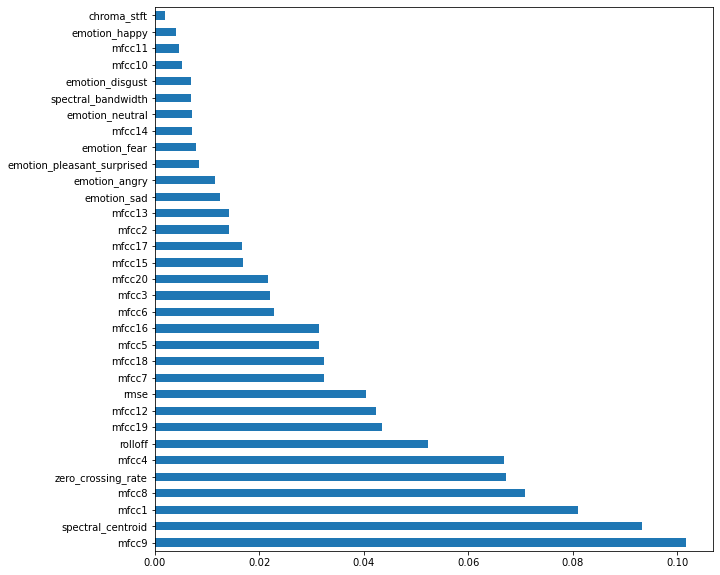

In [21]:
model = ExtraTreesClassifier()
model.fit(X,y)

fig, ax = plt.subplots(figsize=(10,10)) 

feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(33).plot(kind='barh')


## Split data 25% test data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

# SVM.SVC Model

In [23]:

# Simple SVM
print('fitting...')
clf = SVC(C=20.0, gamma=0.00001)
clf.fit(X_train, y_train)
acc = clf.score(X_test, y_test)
print("acc=%0.3f" % acc)


fitting...
acc=0.481


# Optimizing model parameters

# Grid Search

In [24]:


# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Pr

Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.980 (+/-0.016) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.253 (+/-0.001) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
1.000 (+/-0.000) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.980 (+/-0.016) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
1.000 (+/-0.000) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
1.000 (+/-0.000) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
1.000 (+/-0.000) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
1.000 (+/-0.000) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
1.000 (+/-0.000) for {'C': 1, 'kernel': 'linear'}
1.000 (+/-0.000) for {'C': 10, 'kernel': 'linear'}
1.000 (+/-0.000) for {'C': 100, 'kernel': 'linear'}
1.000 (+/-0.000) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             

In [25]:
model_perf= pd.DataFrame(columns=['model','execution_time'])



In [26]:


# store starting time 
begin = time.time() 


for i in range(10):
    clf = SVC(C=100, gamma=0.001,kernel='rbf')
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    print("acc=%0.3f" % acc)   

time.sleep(1) 
# store end time 
end = time.time()
exc_time = end - begin
# total time taken 
print(f"Total runtime of the program is {exc_time} secound")

model_perf=model_perf.append({'model':'svm','execution_time':exc_time},ignore_index=True)


acc=1.000
acc=1.000
acc=1.000
acc=1.000
acc=1.000
acc=1.000
acc=1.000
acc=1.000
acc=1.000
acc=1.000
Total runtime of the program is 1.3091142177581787 secound


In [27]:
model_perf

,model,execution_time
0,svm,1.309114


In [28]:
classifier = svm.SVC(kernel='linear',probability=True)
probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
                     

In [29]:
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
print (f"Area under the ROC curve : {roc_auc}")

Area under the ROC curve : 1.0


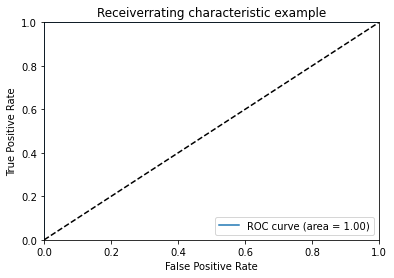

In [30]:
# Plot ROC curve
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiverrating characteristic example')
plt.legend(loc="lower right")
plt.show()


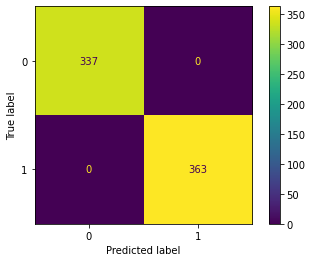

In [31]:
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

In [32]:
begin = time.time() 

for i in range(10):
    classifier = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
    c_score=classifier.score(X_test, y_test)
    print("acc=%0.3f" % c_score)

time.sleep(1) 
# store end time 
end = time.time()
exc_time = end - begin
# total time taken 
print(f"Total runtime of the program is {exc_time} secound")

model_perf=model_perf.append({'model':'Logistic Regression','execution_time':exc_time},ignore_index=True)

acc=1.000
acc=1.000
acc=1.000
acc=1.000
acc=1.000
acc=1.000
acc=1.000
acc=1.000
acc=1.000
acc=1.000
Total runtime of the program is 1.2515664100646973 secound


# LogisticRegression

In [33]:
#Logistic Regression

model = LogisticRegression(C=0.00001,solver='lbfgs')
model.fit(X_train, y_train)

model.score(X_test,y_test)


0.48142857142857143

In [34]:
#dir(model)

model_c=pd.Series(model.coef_[0], index=X_train.columns)
model_c
#X_train.columns

chroma_stft                  -2.470229e-05
rmse                         -1.031976e-03
spectral_centroid            -1.509426e-03
spectral_bandwidth            2.239443e-04
rolloff                      -1.419170e-03
zero_crossing_rate           -1.581408e-03
mfcc1                        -1.458595e-03
mfcc2                         9.441771e-04
mfcc3                         9.720737e-04
mfcc4                        -1.087344e-03
mfcc5                         9.929008e-04
mfcc6                         8.536303e-04
mfcc7                        -8.598185e-04
mfcc8                         1.341065e-03
mfcc9                        -1.416986e-03
mfcc10                       -9.771834e-05
mfcc11                        5.998457e-05
mfcc12                       -1.142748e-03
mfcc13                        7.170564e-04
mfcc14                       -5.355244e-04
mfcc15                        6.165599e-04
mfcc16                        8.521071e-04
mfcc17                       -6.791390e-04
mfcc18     

In [35]:
#Logistic Regression

model = LogisticRegression(C=1,solver='lbfgs')
model.fit(X_train, y_train)

model.score(X_test,y_test)


1.0

In [36]:
model_c=pd.Series(model.coef_[0], index=X_train.columns)
model_c

chroma_stft                   0.262138
rmse                         -2.159376
spectral_centroid            -2.374284
spectral_bandwidth            1.892683
rolloff                      -2.060339
zero_crossing_rate           -2.621350
mfcc1                        -3.298630
mfcc2                         0.161119
mfcc3                         1.651933
mfcc4                        -3.169908
mfcc5                         2.641547
mfcc6                         1.848192
mfcc7                        -2.911279
mfcc8                         3.439490
mfcc9                        -3.495386
mfcc10                       -0.232659
mfcc11                       -0.883321
mfcc12                       -1.807775
mfcc13                        0.739048
mfcc14                       -0.289266
mfcc15                        1.896248
mfcc16                        1.383276
mfcc17                       -1.511250
mfcc18                        1.695143
mfcc19                        2.632188
mfcc20                   

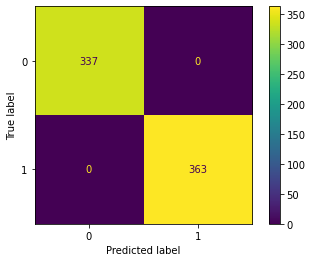

In [37]:
plot_confusion_matrix(model, X_test, y_test)
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=1.000


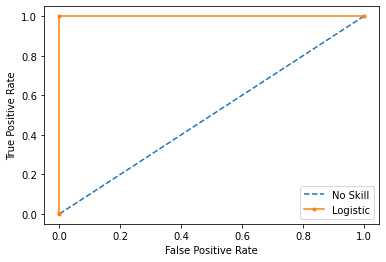

In [38]:
Roc_curve(X_test,y_test,model)

In [39]:
# store starting time 
begin = time.time() 

for i in range(10):
    nca = NeighborhoodComponentsAnalysis(random_state=42)
    knn = KNeighborsClassifier(n_neighbors=3)
    nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
    nca_pipe.fit(X_train, y_train)

    print(f'The accuracy of KNN model : {nca_pipe.score(X_test, y_test)}')

time.sleep(1) 
# store end time 
end = time.time()
exc_time = end - begin
# total time taken 
print(f"Total runtime of the program is {exc_time} secound")

model_perf=model_perf.append({'model':'KNN','execution_time':exc_time},ignore_index=True)

The accuracy of KNN model : 1.0
The accuracy of KNN model : 1.0
The accuracy of KNN model : 1.0
The accuracy of KNN model : 1.0
The accuracy of KNN model : 1.0
The accuracy of KNN model : 1.0
The accuracy of KNN model : 1.0
The accuracy of KNN model : 1.0
The accuracy of KNN model : 1.0
The accuracy of KNN model : 1.0
Total runtime of the program is 63.531712770462036 secound


In [40]:
model_perf

,model,execution_time
0,svm,1.309114
1,Logistic Regression,1.251566
2,KNN,63.531713


In [41]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores


array([0.98392857, 1.        , 0.98392857, 1.        , 1.        ])

In [42]:

clf = LogisticRegression(C=1,solver='lbfgs')
scores = cross_val_score(clf, X, y, cv=5)
scores


array([0.99464286, 1.        , 0.99642857, 1.        , 0.99821429])

In [43]:
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, X, y, cv=5)
scores

array([0.99107143, 1.        , 0.98571429, 1.        , 1.        ])